This file demonstrates the use of Multilayer perceptron and shows how it is better than bigram model by obtaining a loss of 2.15  
It also introduces the method of splitting the data into multiple segments for training, validation and testing

In [18]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [19]:
words = open('names.txt','r').read().split()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [20]:
len(words)

32033

In [21]:
# building the vocabulary
stoi = {}
chars = sorted(list(set(''.join(words))))
stoi = {char:i+1 for i,char in enumerate(chars)}
stoi['.'] = 0
itos = {i:char for char,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [22]:
block_size = 3
X,Y=[],[]

for word in words:
    
    context = [0]*block_size
    for ch in word + '.':
        ix=stoi[ch]
        X.append(context)
        Y.append(ix)
        # print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [23]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [24]:
# Building the dataset
def build_dataset(words):
    block_size = 3
    X,Y=[],[]

    for word in words:

        context = [0]*block_size
        for ch in word + '.':
            ix=stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X,Y
import random
random.seed(42)
random.shuffle(words)
n1=int(len(words)*0.8)
n2=int(len(words)*0.9)

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

In [25]:
g = torch.Generator().manual_seed(2147483647)
C=torch.randn((27,2), generator=g)
w1 = torch.randn((6, 300), generator=g)
b1 = torch.randn((300), generator=g)
w2 = torch.randn((300, 27), generator=g)
b2 = torch.randn((27), generator=g)

In [26]:
parameters = [w1,b1,w2,b2]
sum(p.nelement() for p in parameters)

10227

In [27]:
for p in parameters:
    p.requires_grad= True

In [28]:
lre = torch.linspace(-3,0,1000) # learning rate exponent
lrs = 10**lre # learning rates


In [29]:
lri = []
lossi = []
for i in range(30000):

    # Minibatch construction
    ix = torch.randint(0, Xtr.shape[0], (32,))

    # Forward pass
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1, 6) @ w1 + b1)
    logits = h @ w2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
    # print(loss.item())
    # Backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    # lr = lrs[i]
    lr= 0.01
    for p in parameters:
        p.data += -lr * p.grad

    # Track stats
    lri.append(lr)
    lossi.append(loss.item())



In [30]:
print(loss.item())

3.1818532943725586


In [31]:
# plt.plot(lri, lossi)

In [32]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 6) @ w1 + b1)
logits = h @ w2 + b2
loss = F.cross_entropy(logits, Ydev)
loss.item()     

2.7400805950164795

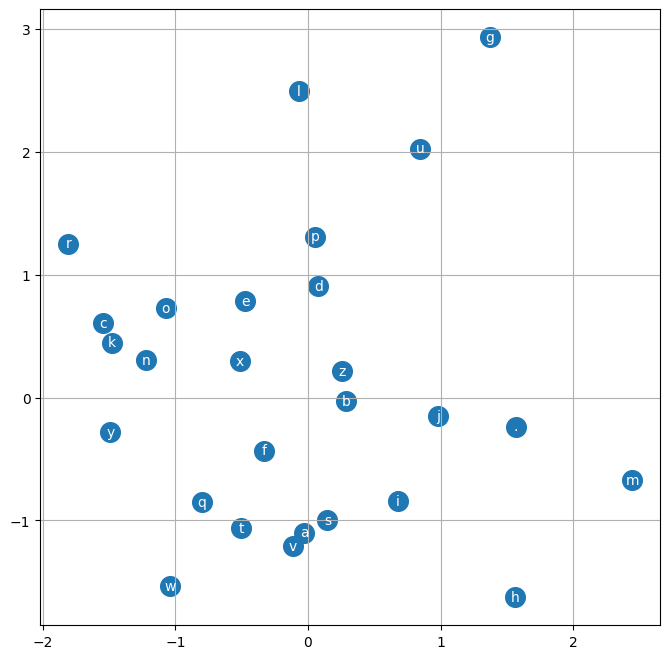

In [33]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0], C[i,1], itos[i], ha='center', va='center', color='white')
plt.grid('minor')

In [34]:
# sampling from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _  in range(20):
    out= []
    context = [0]*block_size
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1, -1) @ w1 + b1)
        logits = h @ w2 + b2
        p = F.softmax(logits, dim=1)
        ix = torch.multinomial(p, 1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    print(''.join(itos[i] for i in out))

mtilia.
yazlsrelmep.
rylpwthtur.
jengrlok.
azelydatlithelynnelle.
elleyn.
aaraelynn.
honaa.
nosribvrishimiya.
ken.
renlynn.
glewtfn.
kamaeder.
yah.
fyels.
kay.
myathydsihea.
aalynns.
fioelylron.
ell.
